# Webtask Demo: Google Search

This notebook demonstrates automated Google search using Webtask with low-level imperative control.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .

Obtaining file:///home/stevewang/Github/web-auto/webtask
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for pywebtask (pyproject.toml) ... done
  Created wheel for pywebtask: filename=pywebtask-0.4.1-0.editable-py3-none-any.whl size=4081 sha256=546f38dd3ada591906d998b8ae31c239b90420cd33f7c28df88e3ae1b78b6b8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-2lo8qzhr/wheels/92/a7/c0/4dbc45136057c0034fb6a0b9b932b4e284b6c17ca90a12ba46
Successfully built pywebtask
  Attempting uninstall: pywebtask
    Found existing installation: pywebtask 0.4.1
    Not uninstalling pywebtask at /home/stevewang/Github/web-auto/webtask/src, outside environment /home/stevewang/Github/web-auto/webtask/venv
    Can't uninstall 'pywebtask'. No files were found to uninstall.

[notice] A new release of pip is available: 25.2 -> 25.3
[n

In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1", temperature=0.3)

/home/stevewang/Github/web-auto/webtask/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with default settings
agent = await wt.create_agent(llm=llm)

## 3. Navigate to Google

Navigate to Google's homepage.

In [5]:
await agent.navigate("google.com")

## 4. Search Query

Type the search query into the input field.

In [6]:
input_field = await agent.select("google search input")
await input_field.type("what is the capital of france?")
await agent.wait(2)

## 5. Final Results

Capture the search results page.

Search Results:


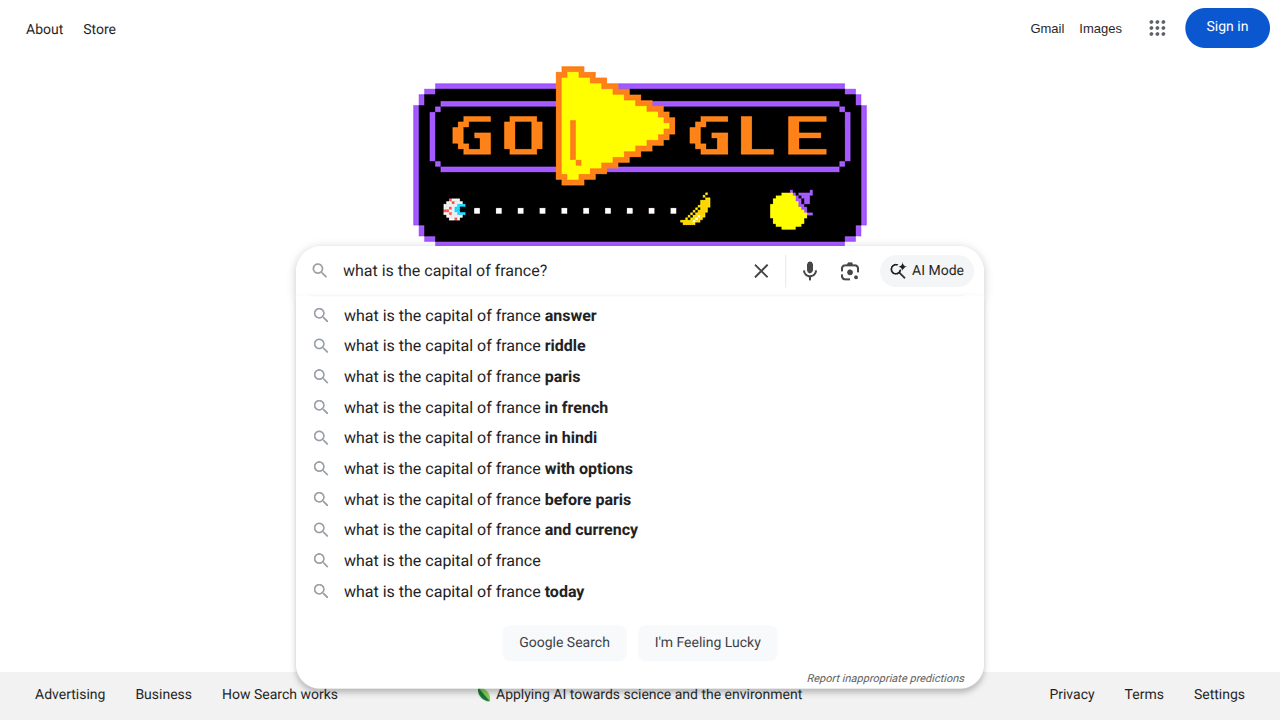

In [7]:
# Take screenshot of search results
print("Search Results:")
await agent.screenshot("search_results.png")
display(Image(filename="search_results.png", width=800))